# General SIR ODE model

The general SIR ODE model is a system of three differential equations for the population of size $n$, divided into three subpopulations $S$ (susceptible), $I$ (infectious) and $R$ (removed), parametrised by the following equations:

$$ \frac{dS}{dt} = - \frac{\beta S I}{n} $$

$$ \frac{dI}{dt} = \frac{\beta S I}{n} - \gamma I $$

$$ \frac{dR}{dt} = \gamma I $$

It follows further from the assumption of static demographics that

$$ S + I + R = n $$

and

$$ \frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0 $$

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 1000
I_0 = 1.0
R_0 = 0.0
S_0 = N - I_0 - R_0
R0 = 2.67
gamma = 1.0/18
beta = R0 * gamma
t = np.linspace(0, 160, 160)

In [3]:
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    Sdot = - beta * S * I / N 
    Idot = (beta * S * I) / N - gamma * I
    Rdot = gamma * I
    return Sdot, Idot, Rdot

In [4]:
y_0 = S_0, I_0, R_0

In [5]:
ret = odeint(sir_model, y_0, t, args=(N, beta, gamma))

In [6]:
S, I, R = ret.T

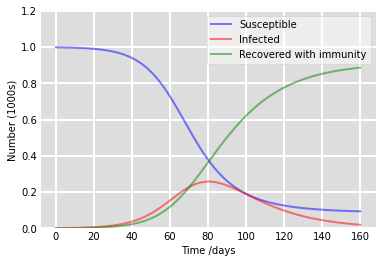

In [7]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Removed')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Individuals (1,000)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()